# Identification of Call Sequences in audio

In [1]:
from dataset import BirdData
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import uniform_filter1d
plt.rcParams['figure.figsize'] = [15,5]

In [2]:
data = BirdData()

In [3]:
file = 10

audio_len = 30

fs, audio_buffer_full = data._read_audio("{}.wav".format(file))
audio_buffer_full = audio_buffer_full[:audio_len * fs, 0]
reduced_audio = data.reduce_noise(audio_buffer_full, fs)

  0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
ipd.Audio(audio_buffer_full, rate=fs)

In [5]:
ipd.Audio(reduced_audio, rate=fs)

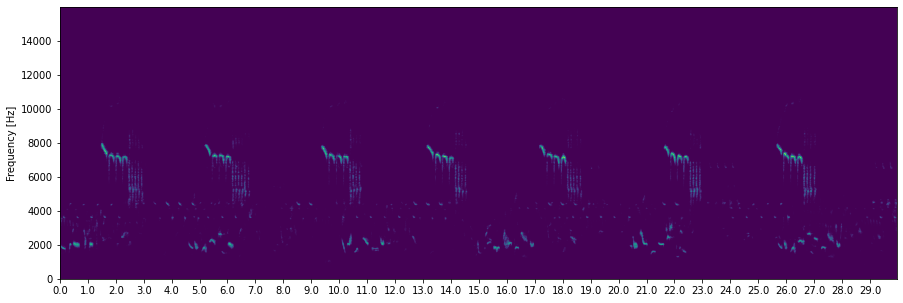

In [6]:
frame_duration = 50 # milli seconds
frame_size = int(frame_duration / 1000 * fs)
start_frame = 0*fs

frame_rate = 100

spec, fig = data.plot_spectrogram(reduced_audio, fs, frame_size, log_spectrogram=True, frame_rate = frame_rate)

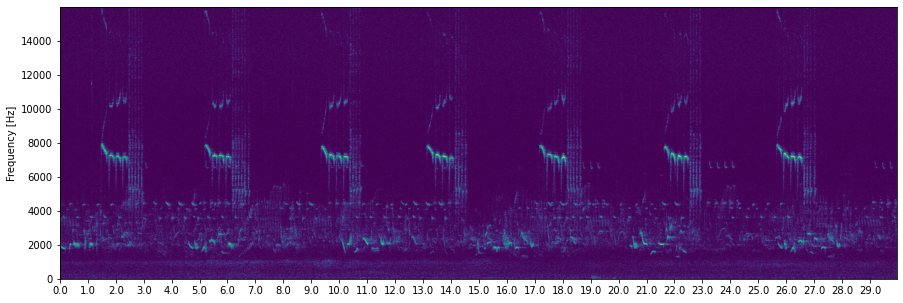

In [7]:
spec, fig = data.plot_spectrogram(audio_buffer_full, fs, frame_size, log_spectrogram=True, frame_rate = frame_rate)

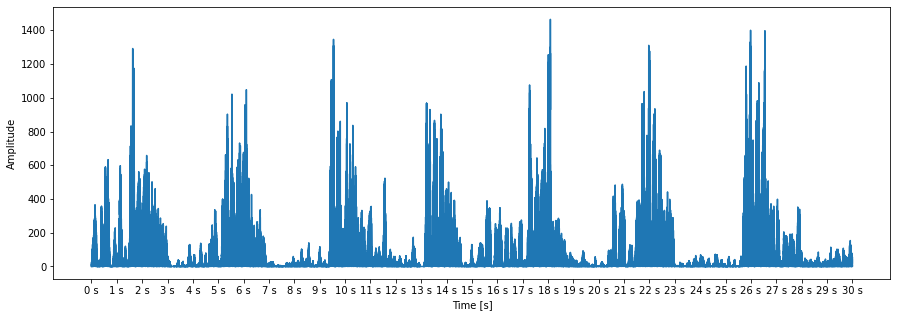

In [8]:
amplitude = np.abs(reduced_audio)


x_ticks = range(0, int(len(amplitude)/fs) + 1)
x_ticks_loc = [ x*fs for x in x_ticks]

plt.plot(amplitude)
x_ticks = [ str(x) + " s" for x in x_ticks ]
plt.xticks(x_ticks_loc, x_ticks)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

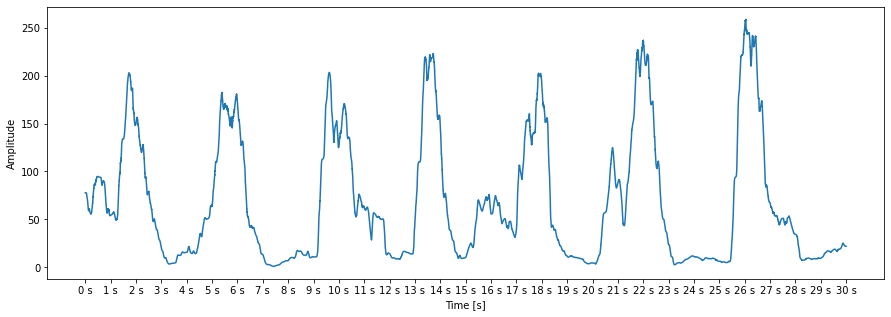

In [9]:
moving_average_size = 500 # ms
size = int(fs / 1000 * moving_average_size)

amplitude_rm = uniform_filter1d(amplitude, size=size)


x_ticks = range(0, int(len(amplitude_rm)/fs) + 1)
x_ticks_loc = [ x*fs for x in x_ticks]

plt.plot(amplitude_rm)
x_ticks = [ str(x) + " s" for x in x_ticks ]
plt.xticks(x_ticks_loc, x_ticks)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [10]:
freqencies, times, plain_specgram = data._get_spectogram(reduced_audio, fs, frame_size, frame_rate = frame_rate)

In [11]:
spectrogram_amplitude_sum = np.sum(plain_specgram, axis=0)

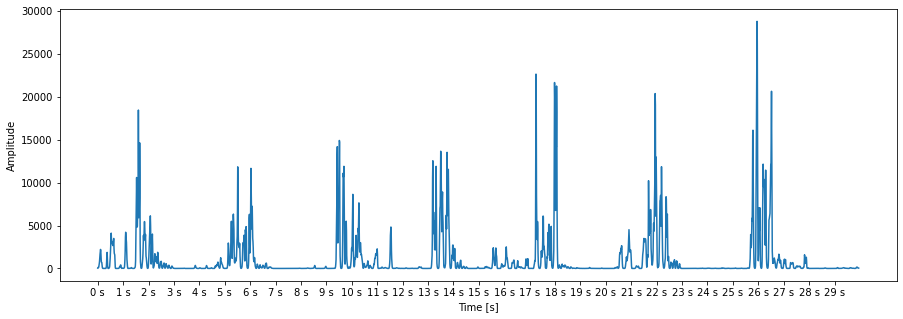

In [12]:
x_ticks = np.arange(0, int(len(spectrogram_amplitude_sum) / 100) + 1, 1)
x_ticks_loc = np.arange(0, len(spectrogram_amplitude_sum), 100)

plt.plot(spectrogram_amplitude_sum)
x_ticks = [ str(x) + " s" for x in x_ticks ]
plt.xticks(x_ticks_loc, x_ticks)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [13]:
moving_average_size = 500 # ms
size = int(frame_rate / 1000 * moving_average_size)

from scipy import signal
win = signal.windows.hann(size)


spec_amplitude_rm = signal.convolve(spectrogram_amplitude_sum, win, mode='same')

spec_amplitude_rm = (spec_amplitude_rm - np.min(spec_amplitude_rm)) / (np.max(spec_amplitude_rm) - np.min(spec_amplitude_rm))

x_ticks = np.arange(0, int(len(spectrogram_amplitude_sum) / 100) + 1, 1)
x_ticks_loc = np.arange(0, len(spectrogram_amplitude_sum), 100)

plt.plot(spec_amplitude_rm)
x_ticks = [ str(x) + " s" for x in x_ticks ]
plt.xticks(x_ticks_loc, x_ticks)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

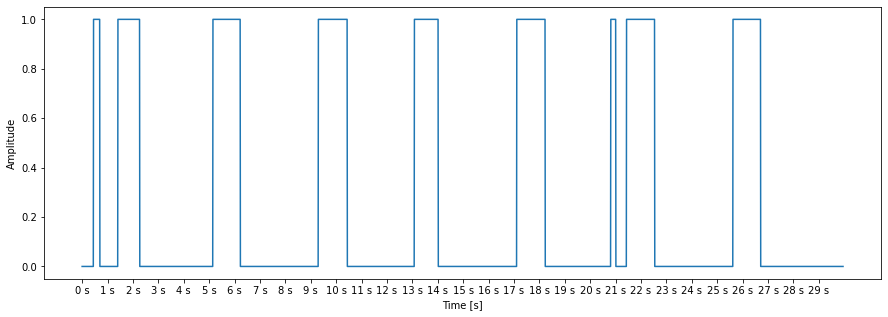

In [14]:
threshold = 0.15

picked = np.where(spec_amplitude_rm > threshold, 1, 0)

x_ticks = np.arange(0, int(len(picked) / 100) + 1, 1)
x_ticks_loc = np.arange(0, len(picked), 100)

plt.plot(picked)
x_ticks = [ str(x) + " s" for x in x_ticks ]
plt.xticks(x_ticks_loc, x_ticks)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [15]:
from scipy.ndimage import maximum_filter

max_filter_size = 500 # ms
size = int(frame_rate / 1000 * max_filter_size)

merged = maximum_filter(picked, size)

x_ticks = np.arange(0, int(len(merged) / 100) + 1, 1)
x_ticks_loc = np.arange(0, len(merged), 100)

plt.plot(merged)
x_ticks = [ str(x) + " s" for x in x_ticks ]
plt.xticks(x_ticks_loc, x_ticks)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [16]:
ax = plt.subplot(211)
spec, fig = data.plot_spectrogram(audio_buffer_full, fs, frame_size, log_spectrogram=True, frame_rate = frame_rate, axs=ax)
ax1 = plt.subplot(212, sharex = ax)

x_ticks = np.arange(0, int(len(merged) / 100) + 1, 1)
x_ticks_loc = np.arange(0, len(merged), 100)

ax1.plot(merged)
x_ticks = [ str(x) + " s" for x in x_ticks ]
ax1.set_xticks(x_ticks_loc)
ax1.set_xticklabels(x_ticks)
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Amplitude")
plt.show()

In [17]:
merged = np.concatenate((merged, [1,1,1,1]))

In [18]:
audio_buffer_full.shape[0] / merged.shape[0]

320.0

In [19]:
audio_buffer_new = audio_buffer_full * np.repeat(merged, 320)

In [20]:
ipd.Audio(audio_buffer_new, rate=fs)